# Week 8: Analyzing Gender Signals in the NYT Best Seller List


In this lecture, we begin with by loading a TSV file that adds `first_name` and `gender_signal` column to the NYT Best Seller list dataset discussed last week. The values in this `gender_signal` column were generated using the methods in a separate supplementary notebook. For the purpose of the final exam, **you are only expected to be familiar with material in this main lecture notebook, not the material in the supplementary notebook.** 

As described in the PDF lecture slides for this week, the approximated gender signals in the "gender_signal" column are by no means meant to be objective or definitive. We introduce the process — based on baby name data — explicitly so that you can be informed and critical about the way that gender is routinely discussed and described in Data Science research.

In this notebook, we
* Load the version of the NYT Best Seller List with the added `first_name_` and `gender_signal` columns, `nyt_full_gender_signal.tsv` as a Pandas DataFrame
* Use the `.groupby()` method to group the data by year and gender signal, which gives us counts for the various gender categories in each year of the NYT Best Seller List dataset
* Use the `.sum()` method to get counts of the total number of entries in each year of the Best Seller List dataset, so that we can record the relative proportion of each gender category for each year
* Plot these results in a variety of manners
* Investigate years of particular interest

## Links

All decisions involved in the creation of the `first_name` and `gender_signal` columns of `nyt_full_gender_signal.tsv` are explained in this week's Lecture Slides (PDF) and in the Week 8 Lecture Supplement (Jupyter Notebook), both linked from the syllabus.

This work draws on the [Gender By Name Data Set](https://archive.ics.uci.edu/ml/datasets/Gender+by+Name)

This lecture draws on Melanie Walsh's discussion of the `.groupby()` method found in her chapter [Pandas Basics II](https://melaniewalsh.github.io/Intro-Cultural-Analytics/03-Data-Analysis/02-Pandas-Basics-Part2.html#groupby-columns)

# Loading `nyt_full_gender_signal.tsv` with Pandas

Let's begin by importing Pandas and loading `nyt_full_gender_signal.tsv`, the file created in the Supplementary Notebook. This will load a DataFrame with two additional columns: `first_name`, the first word in the existing `author` column, and `gender_signal`, which seeks to approximate the **gender signal** carried by that name. `gender_signal` can take one of five values:
- `F` **Female**: first names given to children of female sex in the Gender By Name dataset 90% or more of the time
- `M` **Male**: first names given to children of male sex in the Gender By Name dataset 90% or more of the time
- `A` **Ambiguous**: first names that do not meet either of the 90% thresholds listed above
- `U` **Unknown**: first names that do not appear in the Gender By Name dataset
- `I` **Initials**: authors whose gender is masked by names given only as initials

In [1]:
import pandas as pd

nytg_df = pd.read_csv('nyt_full_gender_signal.tsv', sep="\t")

In [2]:
nytg_df

,year,week,rank,title_id,title,author,first_name,gender_signal
0,1931,1931-10-12,1,6477,The Ten Commandments,Warwick Deeping,Warwick,M
1,1931,1931-10-12,2,1808,Finche'S Fortune,Mazo de la Roche,Mazo,U
2,1931,1931-10-12,3,5304,The Good Earth,Pearl S. Buck,Pearl,F
3,1931,1931-10-12,4,4038,Shadows On The Rock,Willa Cather,Willa,F
4,1931,1931-10-12,5,3946,Scarmouche The King Maker,Rafael Sabatini,Rafael,M
...,...,...,...,...,...,...,...,...
60381,2020,2020-12-06,11,2332,I Would Leave Me If I Could,Halsey,Halsey,A
60382,2020,2020-12-06,12,6601,The Vanishing Half,Brit Bennett,Brit,A
60383,2020,2020-12-06,13,7239,Where The Crawdads Sing,Delia Owens,Delia,F
60384,2020,2020-12-06,14,482,Anxious People,Fredrik Backman,Fredrik,M


Now, using a technique introduced last class, let's get the value counts for each of these categories in the `gender_signal` column.

In [3]:
nytg_df['gender_signal'].value_counts()

gender_signal
M    35656
F    18134
A     3109
I     2461
U     1026
Name: count, dtype: int64

Again, using a technique introduced last class, let's produce a pie chart that demonstrates the relative proprtion of each gender signal category in the dataset.

Axes(0.1275,0.11;0.77x0.77)


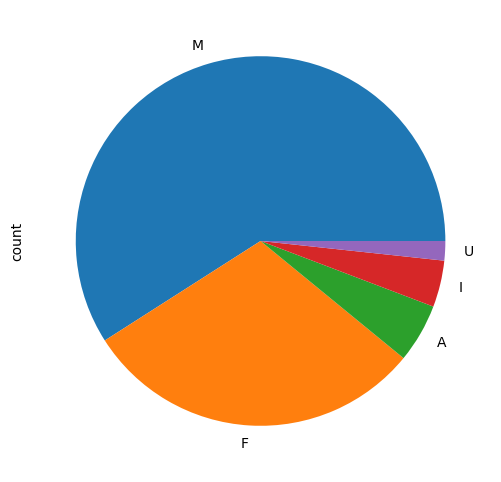

In [34]:
plot = nytg_df['gender_signal'].value_counts().plot(kind="pie", figsize=(6, 6))
print(plot)

Before we move on to do more analysis on the data, let's talk about this data a bit:
- Is it appropriate to use a pie chart in this case?
- We have automated the process of assigning a gender signal to authors in the NYT Best Sellers list. There are undoubtedly errors in this automated assignment. We also know that the Unknown, Initials, and Ambiguous categories contain authors who might belong in the Male or Female signaled names category. Do these flaws in the automation completely invalidate any results we might calculate? 
- Do you have an intuition for which way errors in the way we are automating gender signal might skew the results? For example, if authors with female names believe that they are less likely to sell their work if publishers and readers are biased against female authors then they might be more likely to publish with initials instead of their full name. On the other hand, there may be more male-signalled authors who are known by their initials.
- The level of accuracy of the results may depend on how these results are used. Under what circumstances might the loss of accuracy be acceptable? What might cause you to want to be more careful in ensuring the authors were matched to their correct or preferred genders?

Let's now take a look at the actual names that the `"gender_signal"` column is identifying according to various categories. First let's have a look at the `A` or "ambiguous" category: names that are in the list but don't cross the 90% threshold. 

Using a technique introduced last class, we'll create `gender_filter` variable (a boolean Series) that has a true/false value for whether each row has a `"gender_signal"` value equal to `"A"` — then use that to pull out only the rows of the DataFrame where `"gender_signal"` is `"A"`.

In [5]:
gender_filter = nytg_df['gender_signal']=='A'
type(gender_filter)

pandas.core.series.Series

In [6]:
nytg_df[gender_filter]

,year,week,rank,title_id,title,author,first_name,gender_signal
8,1931,1931-11-16,4,859,Broome Stages,Clemence Dane,Clemence,A
18,1931,1931-12-14,3,2886,Malaysia,Henri Fauconnier,Henri,A
20,1931,1931-12-21,2,859,Broome Stages,Clemence Dane,Clemence,A
24,1931,1931-12-28,3,859,Broome Stages,Clemence Dane,Clemence,A
27,1932,1932-01-04,3,860,Broome Stages,Clemence Dane,Clemence,A
...,...,...,...,...,...,...,...,...
60360,2020,2020-11-29,5,6252,The Sentinel,Lee Child and Andrew Child,Lee,A
60366,2020,2020-11-29,11,6601,The Vanishing Half,Brit Bennett,Brit,A
60377,2020,2020-12-06,7,6252,The Sentinel,Lee Child and Andrew Child,Lee,A
60381,2020,2020-12-06,11,2332,I Would Leave Me If I Could,Halsey,Halsey,A


Note that the above line of code is equivalent to the below (as discussed in last week's lecture notebook). We just think the above is a bit more legible.

In [ ]:
nytg_df[nytg_df['gender_signal']=='A']

Now let's select only the `"first_name"` column, and call the `.unique()` method to see all the unique names that our method has identified as `"A"`

In [7]:
nytg_df[gender_filter]['first_name'].unique()

array(['Clemence', 'Henri', 'Temple', 'Sinclair', 'Jules', 'Jolan',
       'Taylor', 'Lin', 'Jan', 'Bellamy', 'Pat', 'Odell', 'Merle',
       'Hollister', 'Mika', 'Aubrey', 'Tennessee', 'Lael', 'Mickey',
       'Storm', 'Oakley', 'Sloan', 'Santha', 'Honor', 'Han', 'Robin',
       'Noel', 'Alexis', 'Yael', 'Jere', 'Gwyn', 'Terry', 'Elia', 'Jerzy',
       'Sidney', 'Leslie', 'Dee', 'Avery', 'Kit', 'Jackie', 'Marion',
       'Milan', 'Chris', 'Beryl', 'Carmen', 'Marlo', 'Jewel', 'Bailey',
       'Jamie', 'Tracy', 'Nevada', 'Ridley', 'Michel', 'Lee', 'Edwidge',
       'Kim', 'Kelley', 'Kendall', 'Dana', 'Jen', 'Amor', 'Jojo', 'Edan',
       'Brit', 'Greer', 'Tayari', 'Riley', 'Ocean', 'Chandler', 'Leigh',
       'Halsey'], dtype=object)

And now let's repeat that for the `"U"`, `"I"` — and much larger `"F"` and `"M"` — categories. How well is our gender system doing? What are its blind spots? How could it be improved?

In [9]:
gender_filter = nytg_df['gender_signal']=='I'
sorted(nytg_df[gender_filter]['first_name'].unique())

['A.',
 'B.',
 'C.',
 'D.',
 'E.',
 'F.',
 'G.',
 'H.',
 'J.',
 'K.',
 'L.',
 'M.',
 'N.',
 'P.',
 'R.',
 'S.',
 'T.',
 'V.',
 'W.']

In [10]:
gender_filter = nytg_df['gender_signal']=='U'
nytg_df[gender_filter]['first_name'].unique()

array(['Mazo', 'MacKinlay', 'Louis-Ferdinand', 'Kressman', 'various',
       'Vardis', 'Commander', 'Gyspy', 'Struthers', 'Bradda',
       'Gwenthalyn', 'Glenway', 'Lau', 'Elswyth', 'Halldor', 'Inglis',
       'Harnett', 'Feike', 'Rubylea', 'Gore', 'Legette', 'Marghanita',
       'Hanama', 'Viña', 'McCready', 'Marrijane', 'Sergeanne', 'Agnar',
       "Jun'ichiro", 'Trevanian', 'Lothar-Guenther', 'LaVyrle', 'NO',
       'Shel', 'translated', 'Adèle', 'Jhumpa', 'Chang-rae', 'Irène',
       'Brunonia', 'Stieg', 'MaryJanice', 'Téa', 'Kyung-Sook', 'Kresley',
       'Jesmyn', 'Ottessa', 'Yangsze', 'Etaf', 'Ta-Nehisi', 'Akwaeke'],
      dtype=object)

In [11]:
gender_filter = nytg_df['gender_signal']=='F'
nytg_df[gender_filter]['first_name'].unique()

array(['Pearl', 'Willa', 'Edna', 'Margaret', 'Anne', 'Mary', 'Tiffany',
       'Vicki', 'Kathleen', 'Julia', 'Helen', 'Faith', 'Alice', 'Eleanor',
       'Ellen', 'Phyllis', 'Rosamond', 'Isabel', 'Fannie', 'Marjorie',
       'Gladys', 'Bess', 'Janet', 'Sigrid', 'Dorothy', 'Emilie', 'Agatha',
       'Elizabeth', 'Caroline', 'Tess', 'Ann', 'Josephine', 'Somerset',
       'Doris', 'Ruth', 'Ethel', 'Victoria', 'Bessie', 'Rachel', 'Susan',
       'Katherine', 'Enid', 'Frances', 'Marian', 'Rebecca', 'Winifred',
       'Daphne', 'Fanny', 'Marcia', 'Esther', 'Virginia', 'Margery',
       'Sally', 'Rose', 'Gwen', 'Laura', 'Angela', 'Rumer', 'Evelyn',
       'Lella', 'Nina', 'Maritta', 'Allis', 'Marguerite', 'Judith',
       'Mildred', 'Anna', 'Nancy', 'Ngaio', 'Betty', 'Ilka', 'Martha',
       'Lillian', 'Adria', 'Ayn', 'Jessamyn', 'Anya', 'Jo', 'Eudora',
       'Shirley', 'Christine', 'Gabrielle', 'Natalie', 'Arthemise',
       'Emily', 'Monica', 'Norah', 'Mabel', 'Agnes', 'Kathryn', 'Nelia',


In [12]:
nytg_df[nytg_df['first_name'] == 'Ngaio']

,year,week,rank,title_id,title,author,first_name,gender_signal
3655,1943,1943-07-26,5,1107,Colour Scheme,Ngaio Marsh,Ngaio,F
9149,1951,1951-08-05,15,3208,Night At The Vulcan,Ngaio Marsh,Ngaio,F
16184,1960,1960-01-31,11,1739,False Scent,Ngaio Marsh,Ngaio,F
16201,1960,1960-02-07,12,1739,False Scent,Ngaio Marsh,Ngaio,F
16219,1960,1960-02-14,14,1739,False Scent,Ngaio Marsh,Ngaio,F
16234,1960,1960-02-21,13,1739,False Scent,Ngaio Marsh,Ngaio,F
16268,1960,1960-03-06,15,1739,False Scent,Ngaio Marsh,Ngaio,F


In [13]:
gender_filter = nytg_df['gender_signal']=='M'
nytg_df[gender_filter]['first_name'].unique()

array(['Warwick', 'Rafael', 'John', 'Oliver', 'William', 'Francis',
       'Robert', 'Booth', 'Aldous', 'Louis', 'Charles', 'Joseph',
       'Manuel', 'Hugh', 'Thorne', 'Lion', 'Lloyd', 'James', 'Graham',
       'Thomas', 'Guy', 'Hans', 'Hervey', 'Phil', 'Richard', 'Dashiell',
       'Alexander', 'George', 'Eric', 'Stefan', 'Isak', 'Stephen',
       'Maurice', 'Stark', 'Alec', 'Samuel', 'Archie', 'Irving',
       'Kenneth', 'Franz', 'Thornton', 'Edouard', 'Alfred', 'Bruno',
       'Humphrey', 'Erskine', 'David', 'Laurence', 'Clarence', 'Rex',
       'Phillip', 'Barry', 'Johan', 'Arnold', 'Vincent', 'Walter',
       'Dennis', 'Gilbert', 'Maxence', 'Myron', 'Erich', 'Millen',
       'Jerome', 'Trygve', 'Michael', 'Vaughan', 'Clyde', 'Frederic',
       'Leonard', 'Heinrich', 'Cecil', 'Ernest', 'Stuart', 'Elmer',
       'Gunnar', 'Howard', 'Nevil', 'Evan', 'Bruce', 'Pietro', 'Sholem',
       'Christopher', 'Zsolt', 'Henry', 'Upton', 'Marcus', 'Frank',
       'Budd', 'Ben', 'Arthur', 'Austi

In [14]:
nytg_df[nytg_df['first_name'] == 'Dr.']

,year,week,rank,title_id,title,author,first_name,gender_signal
31175,1984,1984-03-18,9,4746,The Butter Battle Book,Dr. Seuss,Dr.,M
31191,1984,1984-03-25,10,4746,The Butter Battle Book,Dr. Seuss,Dr.,M
31201,1984,1984-04-01,5,4746,The Butter Battle Book,Dr. Seuss,Dr.,M
31216,1984,1984-04-08,5,4746,The Butter Battle Book,Dr. Seuss,Dr.,M
31228,1984,1984-04-15,2,4746,The Butter Battle Book,Dr. Seuss,Dr.,M
...,...,...,...,...,...,...,...,...
44066,2000,2000-06-11,10,3343,"Oh, The Places You'Ll Go!",Dr. Seuss,Dr.,M
44080,2000,2000-06-18,9,3343,"Oh, The Places You'Ll Go!",Dr. Seuss,Dr.,M
44097,2000,2000-06-25,10,3343,"Oh, The Places You'Ll Go!",Dr. Seuss,Dr.,M
44110,2000,2000-07-02,8,3343,"Oh, The Places You'Ll Go!",Dr. Seuss,Dr.,M


# Getting the Gender Signal Data into a Useful Form

Let's suppose we've decided our gender signal information is sufficient to proceed with our analysis. The immediate challenge, then, is to get the data into a useful form.

We're interested in knowing how many authors of each gender signal category appears for every year of the dataset.

What data type do want to get our data into? What colums and rows do we want to see, and how do we want them organized? What will the actual values look like?

## `.groupby()`

Let's start our journey with the `.groupby()` method, which allows us to group the data by particular columns and perform calculations on it. For instance, let's try grouping out `nytg_df` DataFrame by the `gender_signal` column.

In [15]:
nytg_df.groupby("gender_signal")

The above command produces a "GroupBy" object.

In [35]:
type(nytg_df.groupby("gender_signal"))

pandas.core.groupby.generic.DataFrameGroupBy

We can perform a few methods on these GroupBy objects. Let's start with `.count()`

In [17]:
nytg_df.groupby("gender_signal").count()

,year,week,rank,title_id,title,author,first_name
gender_signal,,,,,,,
A,3109,3109,3109,3109,3109,3109,3109
F,18134,18134,18134,18134,18134,18134,18134
I,2461,2461,2461,2461,2461,2461,2461
M,35656,35656,35656,35656,35656,35656,35656
U,1026,1026,1026,1026,1026,1026,1026


As you can see, this rearranges our DataFrame so that each possible category in the `"gender_signal"` column now appears as a row, with all the other columns *except* `gender_signal` now appearing along the top. Within the DataFrame, we get counts of many rows containing those particular values for `gender_signal` also have values (of whatever) kind for the other columns — which is not particularly useful information for us, alas, since all the numbers are the same along each row.

We can use the `.size()` method to simplify the output of `.count()`: this gives us the maximum value along that row (which, in this case, is identical for all our columns, because our dataset doesn't have any missing values).

In [18]:
nytg_df.groupby("gender_signal").size()

gender_signal
A     3109
F    18134
I     2461
M    35656
U     1026
dtype: int64

If we use `.count()` on the `"year"` column, what do we get?

In [19]:
nytg_df.groupby("year").count()

,week,rank,title_id,title,author,first_name,gender_signal
year,,,,,,,
1931,25,25,25,25,25,25,25
1932,156,156,156,156,156,156,156
1933,156,156,156,156,156,156,156
1934,404,404,404,404,404,404,404
1935,415,415,415,415,415,415,415
...,...,...,...,...,...,...,...
2016,802,802,802,802,802,802,802
2017,800,800,800,800,800,800,800
2018,780,780,780,780,780,780,780


In [63]:
nytg_df.groupby(["year", "gender_signal"]).count()

week  rank  title_id  title  author  first_name
year gender_signal                                                 
1931 A                 4     4         4      4       4           4
     F                 7     7         7      7       7           7
     I                 4     4         4      4       4           4
     M                 9     9         9      9       9           9
     U                 1     1         1      1       1           1
...                  ...   ...       ...    ...     ...         ...
2020 A                63    63        63     63      63          63
     F               368   368       368    368     368         368
     I                21    21        21     21      21          21
     M               278   278       278    278     278         278
     U                 5     5         5      5       5           5

[423 rows x 6 columns]

We're getting closer! Let's again use `.size()` to simplify this and output it as a Series rather than a DataFrame

In [36]:
nytg_df.groupby(['year', 'gender_signal']).size()

year  gender_signal
1931  A                  4
      F                  7
      I                  4
      M                  9
      U                  1
                      ... 
2020  A                 63
      F                368
      I                 21
      M                278
      U                  5
Length: 423, dtype: int64

The only issue here is that the gender signal categories are "embedded within" each year — when what we need is just a DataFrame where the years are rows and the columns are the gender categories. 

In Pandas-speak, the gender signal values are "stacked" within the year — and we need to `.unstack()` them!

In [37]:
nytg_df.groupby(['year', 'gender_signal']).size().unstack()

gender_signal,A,F,I,M,U
year,,,,,
1931,4.0,7.0,4.0,9.0,1.0
1932,2.0,60.0,18.0,75.0,1.0
1933,13.0,40.0,14.0,87.0,2.0
1934,13.0,108.0,35.0,241.0,7.0
1935,11.0,135.0,29.0,222.0,18.0
...,...,...,...,...,...
2016,36.0,361.0,20.0,385.0,NaN
2017,64.0,276.0,32.0,426.0,2.0
2018,56.0,335.0,54.0,327.0,8.0


This is *almost* excactly what we need. There is only one problem now: not all years have values for all categories, which will confuse our efforts to work with the data in the next stages. For instance, 2016 has `NaN` for `U` — "Not a Number," indicating missing data. 

Thankfully our friend `.unstack()` will take an argument that tells it what to do with any `NaN` situations. In this case, we want it to replace all those with `0`.

In [21]:
nytg_df.groupby(['year', 'gender_signal']).size().unstack(fill_value=0)

gender_signal,A,F,I,M,U
year,,,,,
1931,4,7,4,9,1
1932,2,60,18,75,1
1933,13,40,14,87,2
1934,13,108,35,241,7
1935,11,135,29,222,18
...,...,...,...,...,...
2016,36,361,20,385,0
2017,64,276,32,426,2
2018,56,335,54,327,8


Hooray! That's what we need! Let's stick it in a variable.

This is one of those patterns that you want to store away for later use.  

In [38]:
year_counts = nytg_df.groupby(['year', 'gender_signal']).size().unstack(fill_value=0)

In [24]:
year_counts

gender_signal,A,F,I,M,U
year,,,,,
1931,4,7,4,9,1
1932,2,60,18,75,1
1933,13,40,14,87,2
1934,13,108,35,241,7
1935,11,135,29,222,18
...,...,...,...,...,...
2016,36,361,20,385,0
2017,64,276,32,426,2
2018,56,335,54,327,8


# Calculate Proportion of Each Category for Each Year

Well, it's *almost* everything. The thing we want to calculate in the next step is the **proportion** (or "percentages") of each gender signal category for each year. We don't want to rely on **absolute counts** (just the bare numbers in the columns) because *there are different numbers of entries for each year*, due to the always-changing number of entries on the list, the shift from monthly to weekly lists, etc. 

To calculate **proportions**, we will divide the count for each category by the total number of values for that year. So first let's calculate the total number of entries we have for each year.

You can think of this as a *sum* of all values across an individual row in our `year_counts` DataFrame. 

## `.sum()`


And indeed, the Pandas method we need to calculate the sum of the values in a row is... `.sum()`!

By default, it gives you the sum of *columns* (a "vertical" sum).

In [25]:
year_counts.sum()

gender_signal
A     3109
F    18134
I     2461
M    35656
U     1026
dtype: int64

We can specify that we want the sum of the values in a *row* (a "horizontal" sum) by setting the `axis` to `1`.

(Yes, this is a weird detail, but it comes from the fact that these operations have a default direction, and the default for sum is to sum up a column, so we need away to tell it to use a different direction.  The designers chose the word axis to label the change in direction.)

In [26]:
year_counts.sum(axis=1)

year
1931     25
1932    156
1933    156
1934    404
1935    415
       ... 
2016    802
2017    800
2018    780
2019    750
2020    735
Length: 90, dtype: int64

## Adding a Column to a DataFrame and Filling It with Values

Let's add a new column to our `year_counts` DataFrame that contains these sums. 

The syntax below does the job:
- `year_counts['total']` creates a new column and calls it `"total"`
- `year_counts.sum(axis=1)` stuffs that new column with the values created above

In [39]:
year_counts['total'] = year_counts.sum(axis=1)

In [40]:
year_counts

gender_signal,A,F,I,M,U,total
year,,,,,,
1931,4,7,4,9,1,25
1932,2,60,18,75,1,156
1933,13,40,14,87,2,156
1934,13,108,35,241,7,404
1935,11,135,29,222,18,415
...,...,...,...,...,...,...
2016,36,361,20,385,0,802
2017,64,276,32,426,2,800
2018,56,335,54,327,8,780


## Calculating Proportions and Adding Them to a New Row

Now let's calculate the proportions we discussed above. 

Once again, we'll create a new column and stuff it full of new values. Here we will calculate the percentage of `F` labels in every year: number of `F` counts divided by the total number of counts that year, multiplied by 100. Pandas knows we want to perform this calculation for every single row.

In [51]:
year_counts['prop-F'] = (year_counts['F']/year_counts['total']) * 100

In [31]:
year_counts

gender_signal,A,F,I,M,U,total,prop-F
year,,,,,,,
1931,4,7,4,9,1,25,28.000000
1932,2,60,18,75,1,156,38.461538
1933,13,40,14,87,2,156,25.641026
1934,13,108,35,241,7,404,26.732673
1935,11,135,29,222,18,415,32.530120
...,...,...,...,...,...,...,...
2016,36,361,20,385,0,802,45.012469
2017,64,276,32,426,2,800,34.500000
2018,56,335,54,327,8,780,42.948718


Guess what — by plotting the values of our new column `prop-F` (using techniques introduced in last week's class) we can now produce a very useful plot. Let's analyze it together!

Axes(0.125,0.11;0.775x0.77)


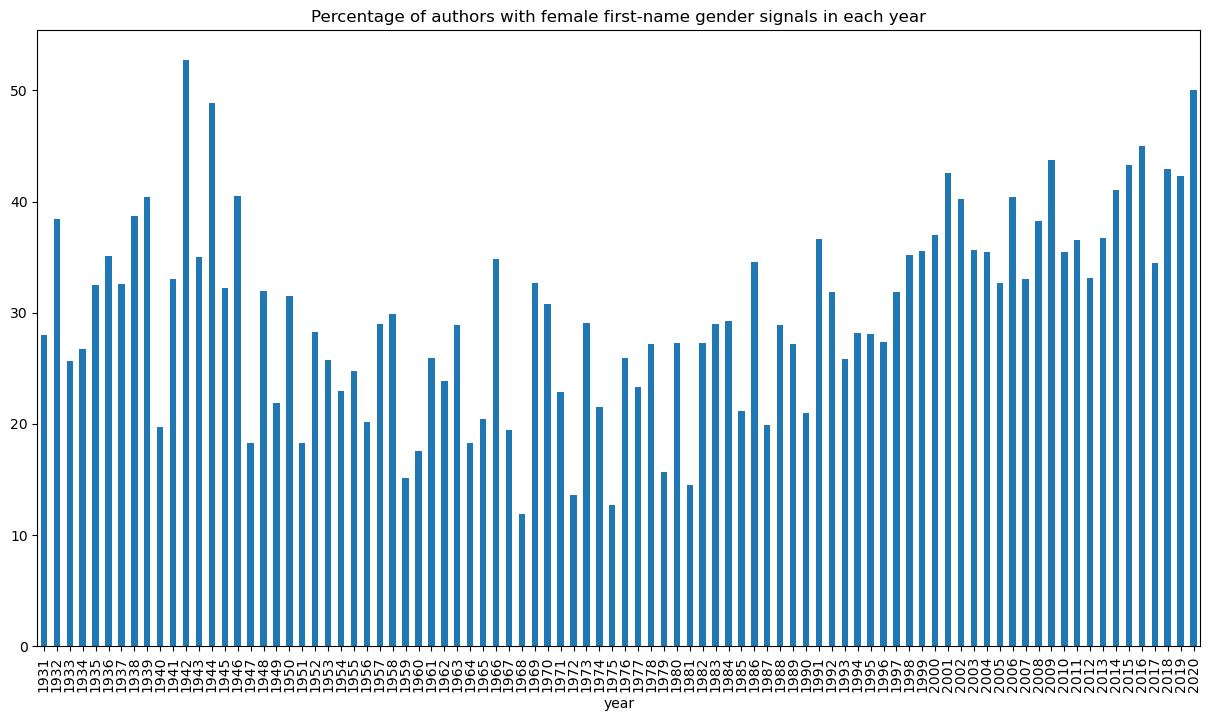

In [52]:
plot = year_counts['prop-F'].plot(kind='bar', title='Percentage of authors with female first-name gender signals in each year', figsize=(15,8))
print(plot)

Let's now create proportional columns for all the other gender signal categories.

In [53]:
year_counts['prop-A'] = (year_counts['A']/year_counts['total']) * 100
year_counts['prop-M'] = (year_counts['M']/year_counts['total']) * 100
year_counts['prop-U'] = (year_counts['U']/year_counts['total']) * 100
year_counts['prop-I'] = (year_counts['I']/year_counts['total']) * 100

Axes(0.125,0.11;0.775x0.77)


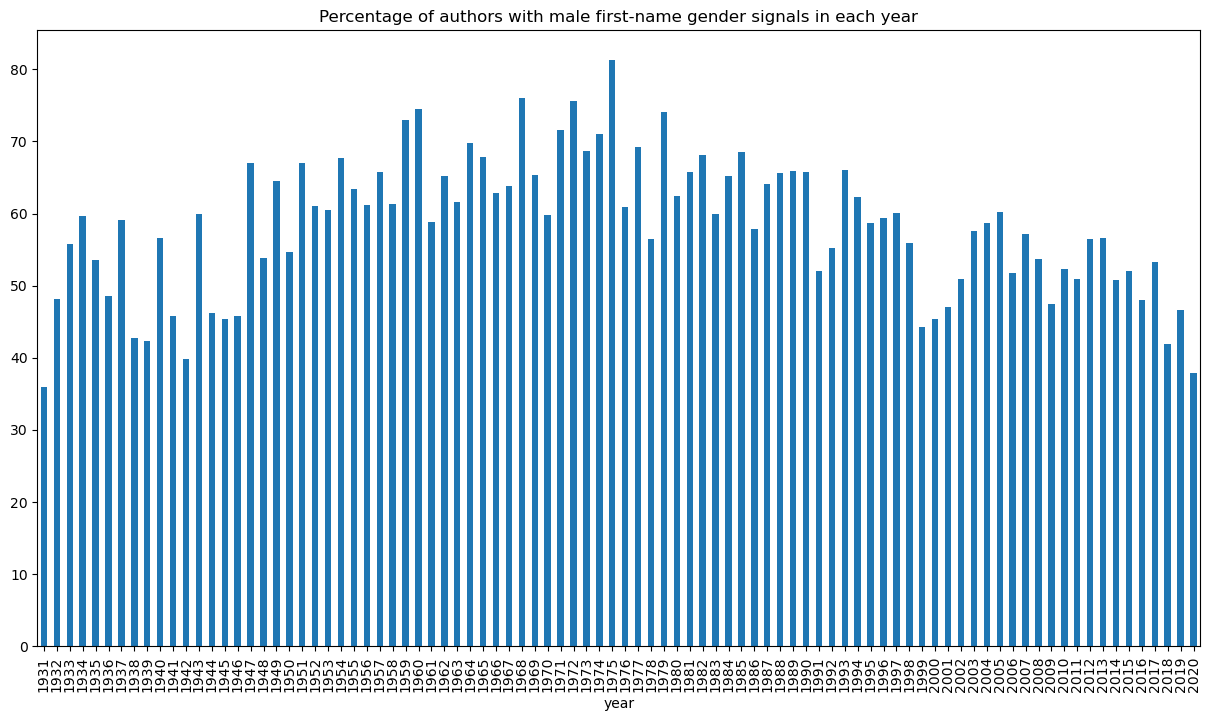

In [54]:
plot = year_counts['prop-M'].plot(kind='bar', title='Percentage of authors with male first-name gender signals in each year', figsize=(15,8))
print(plot)

Axes(0.125,0.11;0.775x0.77)


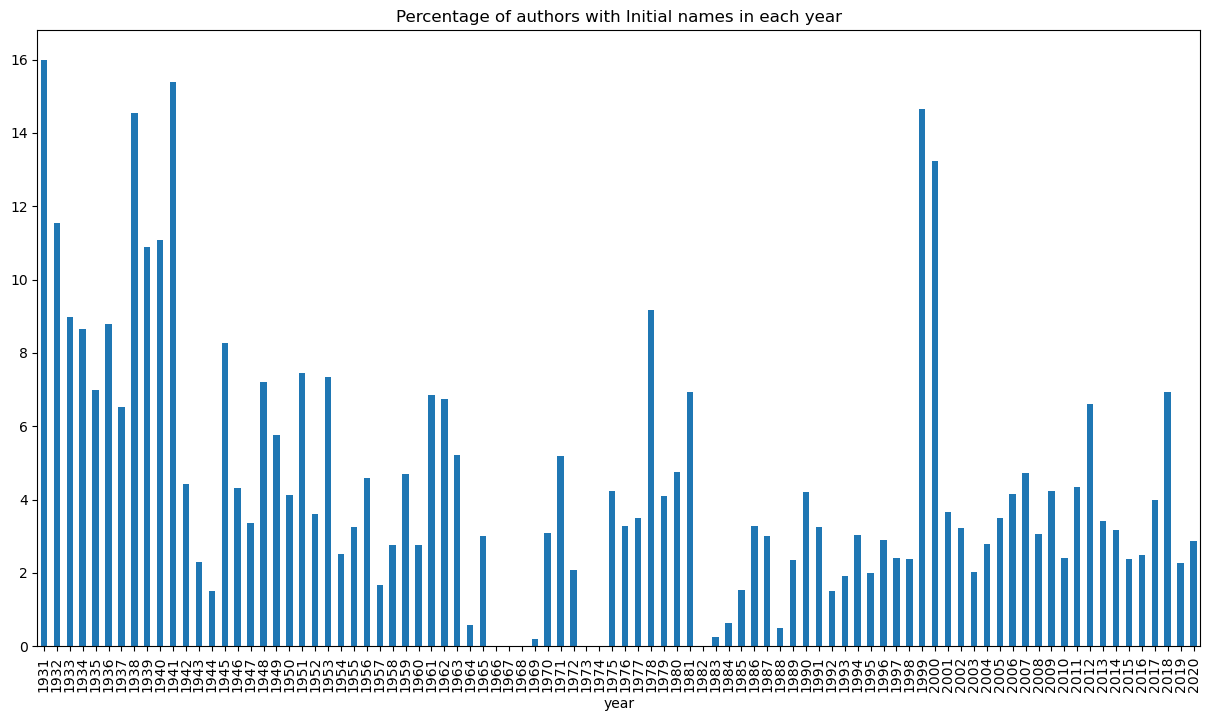

In [55]:
plot = year_counts['prop-I'].plot(kind='bar', title='Percentage of authors with Initial names in each year', figsize=(15,8))
print(plot)

We can plot the values of multiple categories side-by-side. Let's compare the percentage of `M` and `F` categories for each year.

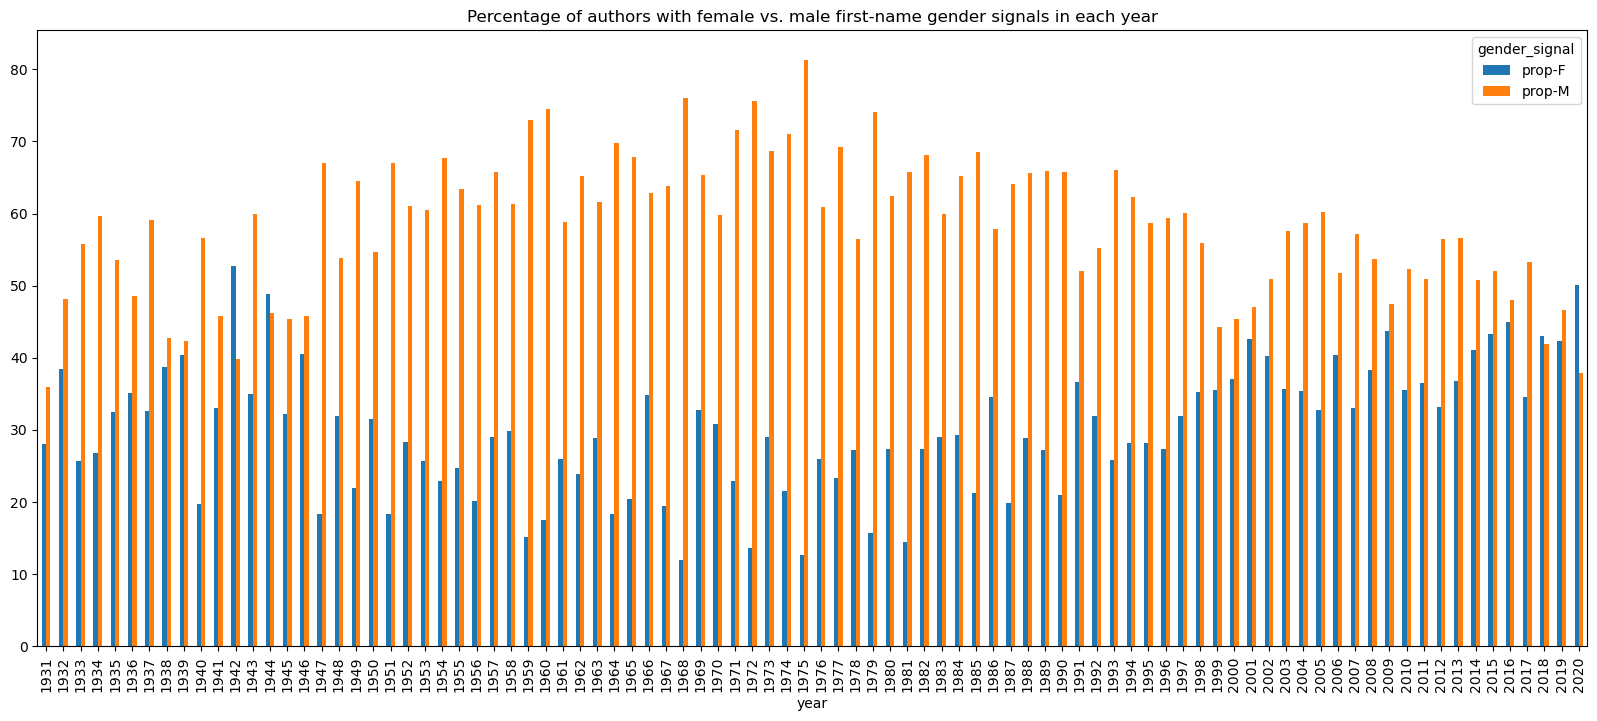

In [57]:
plot = year_counts[['prop-F', 'prop-M']].plot(kind='bar', title='Percentage of authors with female vs. male first-name gender signals in each year', figsize=(20,8))
#print(year_counts.columns)

Here's some code that visualizes this same data as pretty line plots.

Axes(0.125,0.11;0.775x0.77)


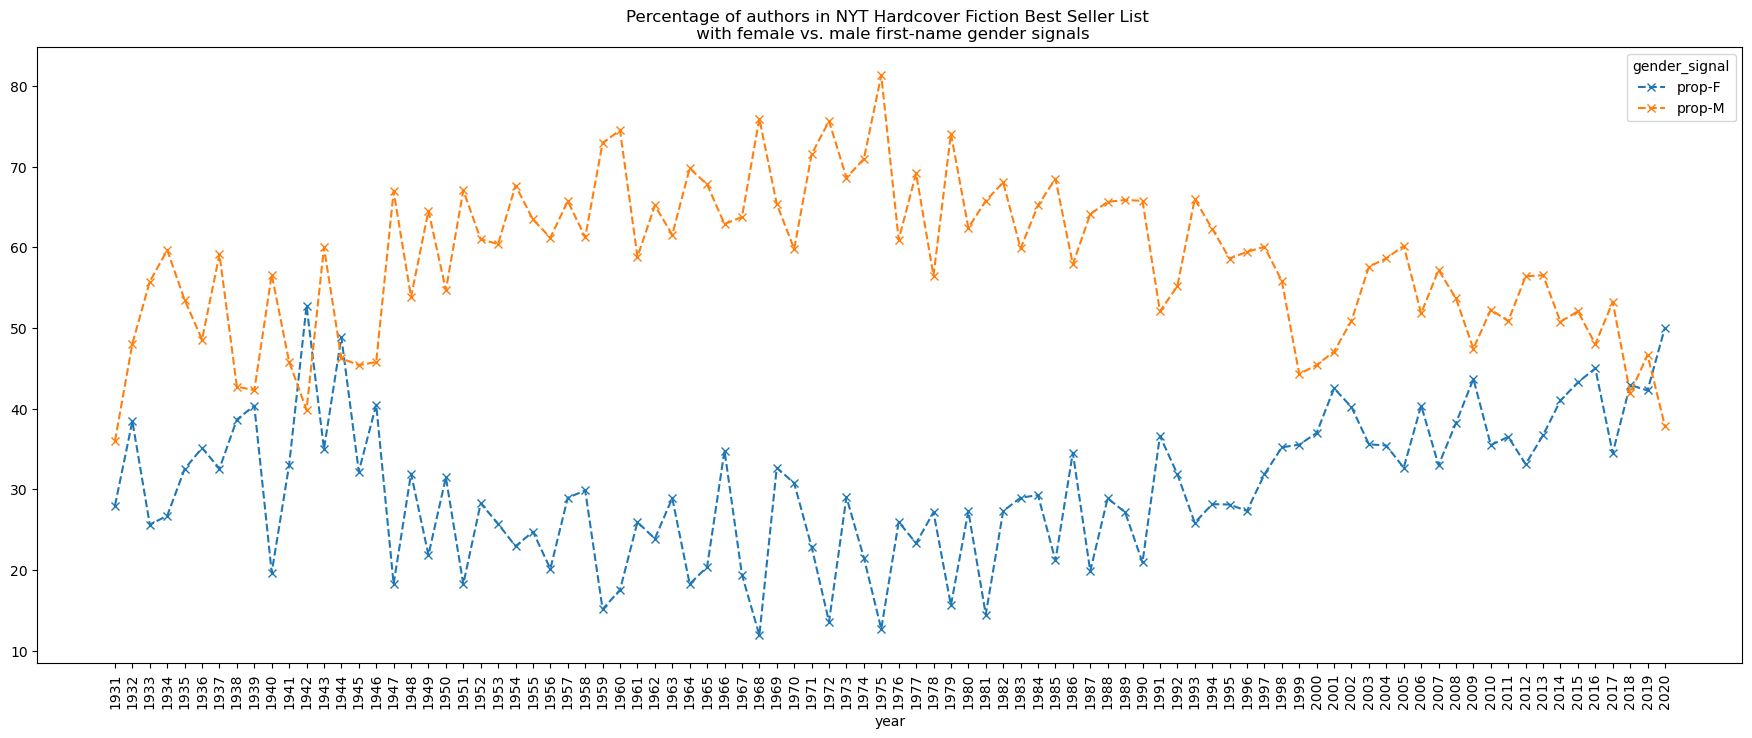

In [58]:
plot = year_counts[['prop-F', 'prop-M']].plot(figsize=(22,8), style='--', marker='x', title='Percentage of authors in NYT Hardcover Fiction Best Seller List \n with female vs. male first-name gender signals')
plot.set_xticks(year_counts.index);
plot.set_xticklabels(year_counts.index, rotation=90)
print(plot)

# Digging into Our Data

Let's use some techniques we've already learned to investigate some potentially significant areas of our dataset that our analysis is revealing...

In [59]:
year_counts['prop-F'].describe()

count    90.000000
mean     30.164324
std       8.822331
min      11.923077
25%      24.112698
50%      29.580804
75%      35.532369
max      52.767528
Name: prop-F, dtype: float64

In [60]:
nytg_df[(nytg_df['year']==1942)]['author'].value_counts()

author
Franz Werfel                              31
Rachel Field                              19
Pearl S. Buck                             19
John Steinbeck                            18
Mary Ellen Chase                          14
Helen MacInnes                            12
Marguerite Steen                          12
Nancy Hale                                12
Louis Bromfield                           11
Daphne du Maurier                         10
Marcia Davenport                           9
Nevil Shute                                9
Austin Wright                              9
Dorothy Macardle                           8
Elizabeth Chevalier                        8
A. J. Cronin                               8
Anna Seghers                               7
Lloyd C. Douglas                           7
James Aldridge                             6
Edna Ferber                                6
Granville Hicks                            5
W. Somerset Maugham                        4
Leg

In [61]:
year_counts['prop-M'].describe()

count    90.000000
mean     58.450391
std       9.468440
min      36.000000
25%      52.071566
50%      59.549655
75%      65.585698
max      81.346154
Name: prop-M, dtype: float64

In [62]:
nytg_df[nytg_df['year']==1975]['author'].value_counts()

author
James A. Michener           42
Arthur Hailey               36
Judith Rossner              28
Nicholas Meyer              25
James Clavell               24
John D. MacDonald           23
Michael Crichton            23
E. L. Doctorow              22
Jack Higgins                21
Richard Adams               21
Thomas Tryon                20
Joseph Heller               19
Allen Drury                 19
Saul Bellow                 17
John Updike                 15
Harold Robbins.             15
Thomas Harris               14
Agatha Christie             13
Jessamyn West               13
John Fowles                 13
Phyllis A. Whitney          12
Morris West                 12
John le Carré               12
Alistair MacLean            12
Irving Stone                10
Frederick Forsyth           10
Chaim Potok                  6
Joseph Wambaugh              5
Lothar-Guenther Buchheim     4
Irwin Shaw                   3
Peter Matthiessen            3
Peter Benchley               3
T